Sentiment Analysis

Importing Required Libraries

In [1]:
import joblib
import numpy as np
import pandas as pd
from keras.layers import LSTM
from keras import preprocessing
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
from keras.utils import pad_sequences
from keras.layers import Flatten, Dense
from tensorflow.keras.models import load_model 
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Embedding, Bidirectional, Dropout

Loading DataSet

In [2]:
data = pd.read_csv("train.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Separating the values of X and Y

In [3]:
x = data.iloc[:50000, 0]
y = data.iloc[:50000, 1]

Applying Tokenization

In [4]:
tokenizer = Tokenizer(num_words = 4800)
tokenizer.fit_on_texts(x)

In [6]:
sequences = tokenizer.texts_to_sequences(x)
maxlen = 100
x = pad_sequences(sequences, maxlen = 100)
x

array([[ 954,  183,    1, ...,  125, 4103,  486],
       [  45,   29,    1, ..., 1977,   69,  221],
       [1026,  220,  230, ...,   63,   16,  350],
       ...,
       [   9,  200,   26, ..., 1957,    2,    2],
       [ 144,   16,   47, ...,   67,  739,   42],
       [  49,   14,   47, ...,  794,   11,   17]])

Applying One Hot Encoder to convert Categorical Columns into Numerical Columns

In [10]:
binr = pre.OneHotEncoder()
y = binr.fit_transform(np.c_[y]).toarray()
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [11]:
early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 8,
    restore_best_weights = True
    )

Training The Model

In [13]:
from keras.models import Sequential
model = Sequential()
model.add(Embedding(4800,8))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(8, return_sequences=True)))
model.add(Dropout(0.3))
model.add(LSTM(8))
model.add(Dropout(0.4))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [15]:
history = model.fit(x, y, epochs=16, batch_size=20, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/20


2000/2000 [==============================] - 145s 67ms/step - loss: 0.5060 - acc: 0.7538 - val_loss: 0.3655 - val_acc: 0.8388
Epoch 2/20
2000/2000 [==============================] - 178s 89ms/step - loss: 0.3540 - acc: 0.8591 - val_loss: 0.3371 - val_acc: 0.8542
Epoch 3/20
2000/2000 [==============================] - 164s 82ms/step - loss: 0.3347 - acc: 0.8681 - val_loss: 0.3152 - val_acc: 0.8642
Epoch 4/20
2000/2000 [==============================] - 172s 86ms/step - loss: 0.3226 - acc: 0.8737 - val_loss: 0.3250 - val_acc: 0.8660
Epoch 5/20
2000/2000 [==============================] - 188s 94ms/step - loss: 0.3177 - acc: 0.8762 - val_loss: 0.3286 - val_acc: 0.8617
Epoch 6/20
2000/2000 [==============================] - 153s 76ms/step - loss: 0.3153 - acc: 0.8789 - val_loss: 0.3348 - val_acc: 0.8540
Epoch 7/20
2000/2000 [==============================] - 171s 86ms/step - loss: 0.3100 - acc: 0.8813 - val_loss: 0.3357 - val_acc: 0.8621
Epoch 8/20
2000/2000 [=================

Plotting the model

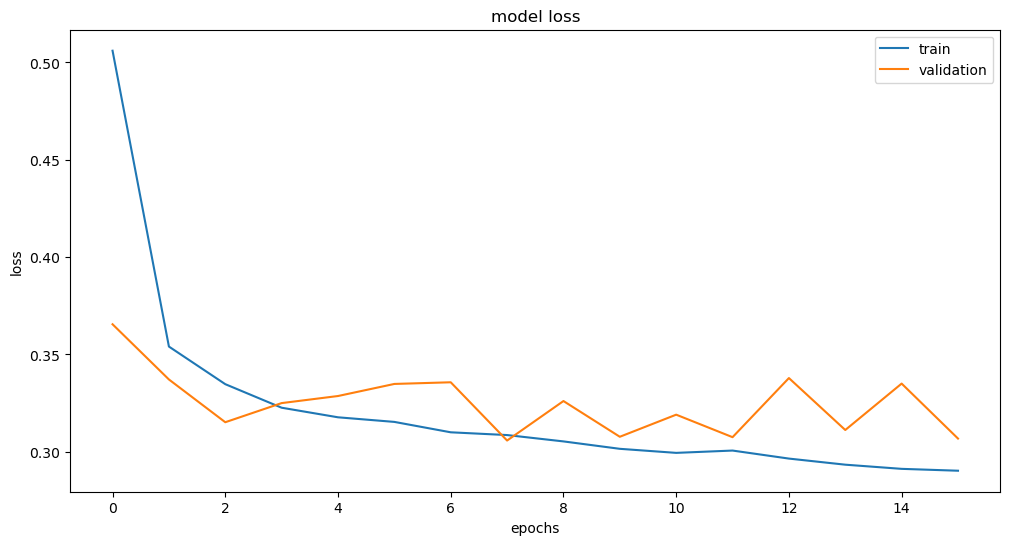

In [17]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss"); plt.ylabel('loss'); plt.xlabel("epochs")
plt.legend(['train', 'validation'] , loc='upper right')
plt.show()

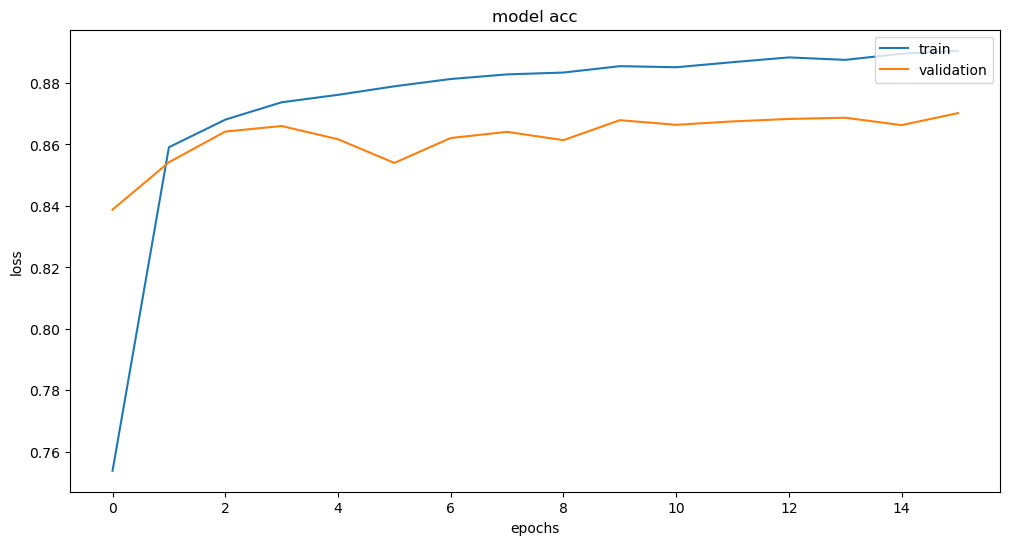

In [18]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model acc"); plt.ylabel('loss'); plt.xlabel("epochs")
plt.legend(['train', 'validation'] , loc='upper right')
plt.show()

Save the model for Future use.

In [19]:
joblib.dump(tokenizer, 't4.joblib')
joblib.dump(binr, 'b4.joblib')
joblib.dump = (model, 'm4.joblib')
['m4.joblib']
model.save("m4.h5")

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the trained model.

In [4]:
loaded_tokenizer = joblib.load('t4.joblib')
loaded_binr = joblib.load('b4.joblib')
loaded_model = load_model('m4.h5')

Finally Test the model on Comments

In [5]:
input_text = "I am happy to do this project but I am not satisfied of the performnace of this project "
input_sequence = loaded_tokenizer.texts_to_sequences([input_text])
print(input_sequence)

[[10, 235, 673, 5, 77, 11, 1146, 18, 10, 235, 21, 4117, 4, 1, 4, 11, 1146]]


In [6]:
input_paded = pad_sequences(input_sequence , maxlen=90)
predicted_ans = loaded_model.predict(input_paded)
predicted_labels = loaded_binr.inverse_transform(predicted_ans)
print(predicted_labels)

1/1 [==============================] - 3s 3s/step
[['negative']]


In [6]:
input_text = "The Sentiment analysis project is working fine but I am satisfied and it meets the requirements effectively but it creates misunderstandings"
input_sequence = loaded_tokenizer.texts_to_sequences([input_text])
print(input_sequence)

[[1, 1146, 6, 765, 485, 18, 10, 235, 4117, 2, 9, 912, 1, 2581, 18, 9, 2170]]


In [7]:
input_paded = pad_sequences(input_sequence , maxlen=90)
predicted_ans = loaded_model.predict(input_paded)
predicted_labels = loaded_binr.inverse_transform(predicted_ans)
print(predicted_labels)

1/1 [==============================] - 0s 73ms/step
[['positive']]
